In [1]:
import pandas as pd 
import numpy as np 
import seaborn as snn
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('C:/Users/Ismail/Desktop/default Data/store/case study/retail_price.csv')
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


## استكشاف وتنظيف البيانات

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [4]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [5]:
df.shape

(676, 30)

In [6]:
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['product_id'].value_counts()

product_id
health5       20
health7       20
bed2          19
garden1       18
health9       18
garden3       18
computers4    18
health8       17
watches1      17
garden9       17
garden2       17
garden7       16
garden10      16
garden6       16
bed1          16
computers1    15
cool1         15
watches3      15
watches2      15
garden5       14
garden4       14
garden8       14
watches6      14
perfumery2    13
cool2         13
furniture2    13
health2       13
furniture1    13
perfumery1    13
cool5         13
watches7      12
furniture3    12
consoles1     12
health4       11
bed3          11
computers3    10
computers2    10
bed4          10
consoles2     10
watches4      10
watches5      10
furniture4    10
watches8      10
health1        9
cool4          9
computers6     8
computers5     8
health3        8
cool3          7
health10       7
health6        7
bed5           5
Name: count, dtype: int64

In [9]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [10]:
df['month_year']=pd.to_datetime(df['month_year'])

In [11]:
df['month_year'].dtypes

dtype('<M8[ns]')

In [12]:
df.dtypes

product_id                            object
product_category_name                 object
month_year                    datetime64[ns]
qty                                    int64
total_price                          float64
freight_price                        float64
unit_price                           float64
product_name_lenght                    int64
product_description_lenght             int64
product_photos_qty                     int64
product_weight_g                       int64
product_score                        float64
customers                              int64
weekday                                int64
weekend                                int64
holiday                                int64
month                                  int64
year                                   int64
s                                    float64
volume                                 int64
comp_1                               float64
ps1                                  float64
fp1       

## EDA نظرة عامة 

In [13]:
# عدد  الفئات 
df['product_category_name'].unique()

array(['bed_bath_table', 'garden_tools', 'consoles_games',
       'health_beauty', 'cool_stuff', 'perfumery',
       'computers_accessories', 'watches_gifts', 'furniture_decor'],
      dtype=object)

<Axes: >

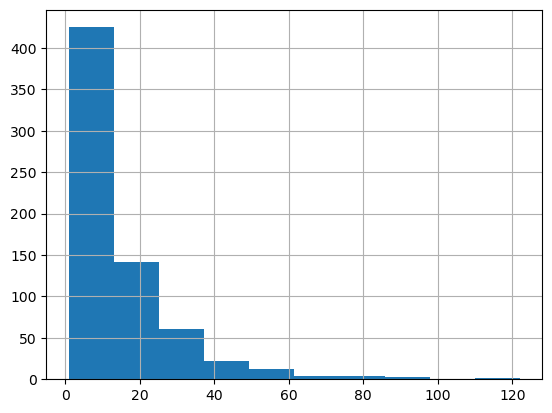

In [14]:
# توزيع الكميات ؟
df['qty'].hist()

In [15]:
# توزيع الاسعار 
df[['unit_price','freight_price']].corr()

,unit_price,freight_price
unit_price,1.000000,0.203659
freight_price,0.203659,1.000000


In [16]:
# unit price  اقل و اعلي 
df['unit_price'].describe()

count    676.000000
mean     106.496800
std       76.182972
min       19.900000
25%       53.900000
50%       89.900000
75%      129.990000
max      364.000000
Name: unit_price, dtype: float64

In [17]:
# product_photos_qty عدد المنتجات حسب ال 
df['product_photos_qty'].nunique()

7

<Axes: xlabel='qty', ylabel='total_price'>

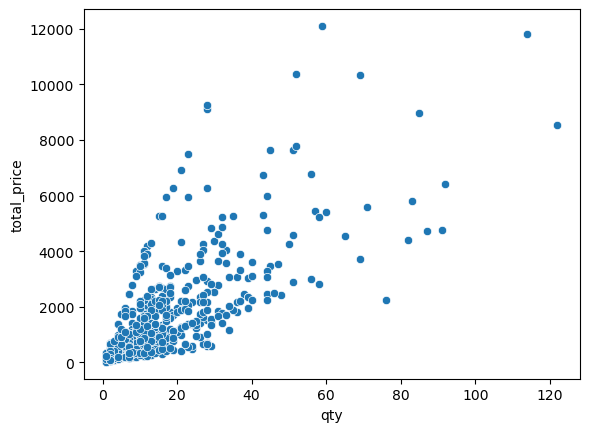

In [18]:
# total_price و  qty  العلاقة بين 
snn.scatterplot(x='qty',y='total_price',data=df)

## month_year تجليل زمني جسب 

In [19]:
# تجميع حسب الشهر: اجمالي الكميات والايرادات
df['month']=df['month_year'].dt.month
monthly=df.groupby('month').agg({'qty':'sum','total_price':'sum'})

In [20]:
monthly

,qty,total_price
month,,
1,9799,961751.1


In [21]:
mon=df.groupby('month_year').agg({'qty':'sum','total_price':'sum'})

In [22]:
mon

,qty,total_price
month_year,,
2017-01-01,9,2864.19
2017-01-02,35,3584.11
2017-01-03,101,10204.38
2017-01-04,121,11524.62
2017-01-05,222,21843.33
2017-01-06,233,23245.24
2017-01-07,403,41049.89
2017-01-08,495,49550.41
2017-01-09,450,44826.60


In [23]:
# معدل النمو الشهري
mon['groth']=mon['total_price'].pct_change()

In [24]:
mon['groth']

month_year
2017-01-01         NaN
2017-01-02    0.251352
2017-01-03    1.847117
2017-01-04    0.129380
2017-01-05    0.895362
2017-01-06    0.064180
2017-01-07    0.765948
2017-01-08    0.207078
2017-01-09   -0.095333
2017-01-10    0.083495
2017-01-11    0.791453
2017-01-12   -0.249379
2018-01-01    0.187690
2018-01-02    0.138022
2018-01-03   -0.036546
2018-01-04   -0.106675
2018-01-05    0.200669
2018-01-06   -0.447084
2018-01-07   -0.086952
2018-01-08   -0.183993
Name: groth, dtype: float64

In [25]:
# تحليل الموسمية
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(mon['total_price'], period=12)
res.plot()


ValueError: x must have 2 complete cycles requires 24 observations. x only has 20 observation(s)

## تجليل جسب الفئة 

In [ ]:
df.columns

In [ ]:
# اعلي 10 فئات في حجم المبيعات
df.groupby('product_category_name')['total_price'].sum().sort_values(ascending=False)

In [ ]:
# اعلي 10 فئات بالايراد
df.groupby('product_category_name')['qty'].sum().sort_values(ascending=False)

In [ ]:
# unit price متوسط كل فئة ل 
df.groupby('product_category_name')['unit_price'].mean()

In [ ]:
#لكل فئة total price و  freight  نسبة 
df.groupby('product_category_name')[['total_price','freight_price']].sum()

In [ ]:
# التغيير ضمن الفئة شهريا
df.groupby('product_category_name')['month_year'].count()

## (freight , pricing) التحاليل السعرية 


In [ ]:
#unit price ,freight price  هل هناك فرق بين 
df[['unit_price','freight_price']].corr()

## اسالة جديدة

<Axes: >

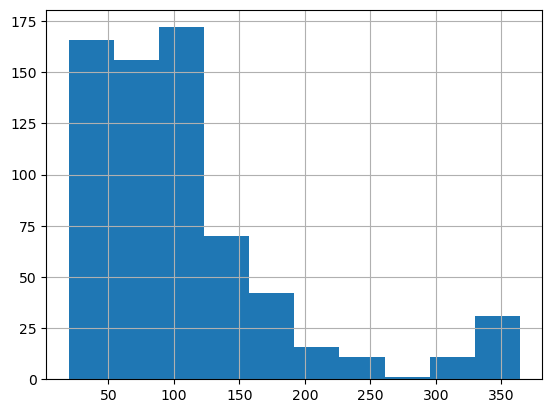

In [26]:
# log price التوزيع في 
df['lag_price'].hist()

In [27]:
# unit pricr  مقارنة lag price 
df[['unit_price','lag_price']].corr()

,unit_price,lag_price
unit_price,1.000000,0.994453
lag_price,0.994453,1.000000


In [28]:
(df['unit_price']-df['lag_price']).describe()

count    676.000000
mean      -0.902885
std        8.104240
min      -76.550682
25%       -0.181151
50%        0.000000
75%        0.050000
max       67.920000
dtype: float64

In [29]:
# comp_1,comp_2,comp_3 من فيهم لديه منافسة عالية
pd.concat([df['comp_1'],df['comp_2'],df['comp_3']]).value_counts().head()

59.90    159
58.99    107
49.90     93
23.99     92
99.99     81
Name: count, dtype: int64

In [30]:
# sp1,sp2,sp3 عدد التكرارات ل 
pd.concat([df['ps1'],df['ps2'],df['ps3']]).value_counts().head()


4.2    547
4.1    483
4.3    288
3.9    251
3.8    124
Name: count, dtype: int64

In [31]:
# comp1 fp1 العلاقة بين 
df[['comp_1','fp1']].corr()

,comp_1,fp1
comp_1,1.000000,0.401177
fp1,0.401177,1.000000


In [32]:
df.groupby('comp_1')['fp1'].mean()

comp_1
19.900000     15.256720
19.990000     13.604895
21.542857     13.534286
23.397407     14.276786
23.990000     13.846120
                ...    
241.006000    21.318000
255.610000    21.226667
330.000000    17.309048
339.900000    17.130000
349.900000    24.271339
Name: fp1, Length: 88, dtype: float64

In [33]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [34]:
# مع الشهور unit price هل يتغير 
df.groupby('month_year')['unit_price'].mean()

month_year
2017-01-01    207.445000
2017-01-02    127.827143
2017-01-03    122.586615
2017-01-04    119.288667
2017-01-05    104.785769
2017-01-06    112.152081
2017-01-07    105.111896
2017-01-08    114.737339
2017-01-09    112.336313
2017-01-10    113.623544
2017-01-11    105.089355
2017-01-12    109.526701
2018-01-01    109.686025
2018-01-02    107.690421
2018-01-03    101.809616
2018-01-04    101.762989
2018-01-05    100.167249
2018-01-06     97.013803
2018-01-07     96.016725
2018-01-08     95.216471
Name: unit_price, dtype: float64

In [35]:
#  حسب الشهور unit price تحليل الانحراف المعياري في 
df.groupby('month_year')['unit_price'].std()

month_year
2017-01-01    201.461793
2017-01-02     95.793880
2017-01-03     86.322267
2017-01-04     85.709981
2017-01-05     72.993023
2017-01-06     68.553294
2017-01-07     70.255752
2017-01-08     84.285600
2017-01-09     85.059596
2017-01-10     83.248647
2017-01-11     76.036949
2017-01-12     78.610107
2018-01-01     78.367003
2018-01-02     76.530428
2018-01-03     72.431801
2018-01-04     70.818569
2018-01-05     75.142898
2018-01-06     71.757068
2018-01-07     70.245947
2018-01-08     70.456892
Name: unit_price, dtype: float64

In [36]:
# lag price الانحراف في 
df.groupby('month_year')['lag_price'].std()

month_year
2017-01-01    201.461793
2017-01-02     95.804271
2017-01-03     86.723828
2017-01-04     85.052425
2017-01-05     73.149774
2017-01-06     69.528840
2017-01-07     70.059495
2017-01-08     85.065351
2017-01-09     86.853525
2017-01-10     81.391275
2017-01-11     79.472112
2017-01-12     75.331030
2018-01-01     78.118373
2018-01-02     77.746710
2018-01-03     76.593723
2018-01-04     73.012173
2018-01-05     76.526114
2018-01-06     71.733886
2018-01-07     73.069332
2018-01-08     70.812394
Name: lag_price, dtype: float64

In [37]:
# توزيع طول الاسم 
df['product_name_lenght'].value_counts()

product_name_lenght
59    103
54     60
33     59
57     47
58     45
35     42
49     34
56     31
48     26
55     22
51     20
42     20
47     18
39     16
40     16
45     15
50     15
36     14
29     13
44     13
60     13
41     12
46     12
38     10
Name: count, dtype: int64

<Axes: >

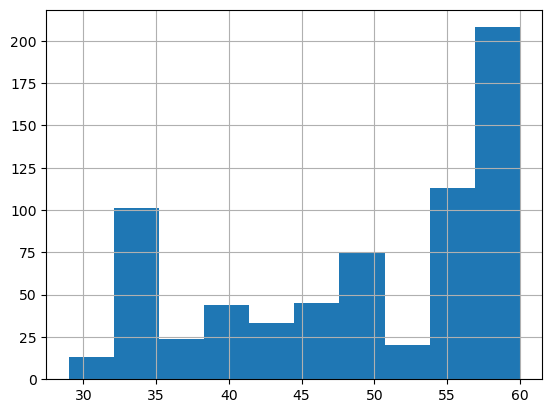

In [38]:
df['product_name_lenght'].hist()

<Axes: >

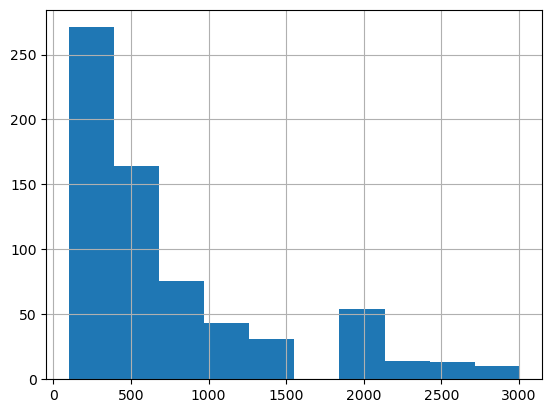

In [39]:
# توزيع طول الوصف
df['product_description_lenght'].hist()

In [40]:
# هل هناك علاقة بين طول الاسم والسعر
df.groupby('product_name_lenght')['unit_price'].mean()

product_name_lenght
29    123.823010
33    129.109785
35    168.749877
36     94.568207
38     46.725444
39     42.211989
40    111.430559
41     36.705574
42    178.685062
44     77.509897
45     92.482149
46    305.690296
47    105.374574
48     61.803152
49     46.516176
50     92.892564
51    350.744318
54     85.334305
55     61.000682
56     68.581891
57     61.594038
58     86.796560
59     79.778095
60    326.991758
Name: unit_price, dtype: float64

In [41]:
df[['product_name_lenght','unit_price']].corr()


,product_name_lenght,unit_price
product_name_lenght,1.000000,-0.170613
unit_price,-0.170613,1.000000


In [42]:
# طباعة اول 5 منتجات لكل فئة
df.groupby

<bound method DataFrame.groupby of     product_id product_category_name month_year  qty  total_price  \
0         bed1        bed_bath_table 2017-01-05    1        45.95   
1         bed1        bed_bath_table 2017-01-06    3       137.85   
2         bed1        bed_bath_table 2017-01-07    6       275.70   
3         bed1        bed_bath_table 2017-01-08    4       183.80   
4         bed1        bed_bath_table 2017-01-09    2        91.90   
..         ...                   ...        ...  ...          ...   
671       bed5        bed_bath_table 2017-01-05    1       215.00   
672       bed5        bed_bath_table 2017-01-06   10      2090.00   
673       bed5        bed_bath_table 2017-01-07   59     12095.00   
674       bed5        bed_bath_table 2017-01-08   52     10375.00   
675       bed5        bed_bath_table 2017-01-09   32      5222.36   

     freight_price  unit_price  product_name_lenght  \
0        15.100000   45.950000                   39   
1        12.933333   45.95

In [43]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')